## Data loading

### Subtask:
Load the housing maintenance code complaints dataset.


**Reasoning**:
Load the dataset into a pandas DataFrame and handle potential encoding issues.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Housing_Maintenance_Code_Complaints_and_Problems_20250430.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('Housing_Maintenance_Code_Complaints_and_Problems_20250430.csv', encoding='latin-1')
    except Exception as e:
        print(f"Error loading the file: {e}")
        df = pd.DataFrame() # Create an empty DataFrame in case of failure

display(df.head())

,Received Date,Problem ID,Complaint ID,Building ID,Borough,House Number,Street Name,Post Code,Block,Lot,...,Problem Duplicate Flag,Complaint Anonymous Flag,Unique Key,Latitude,Longitude,Council District,Census Tract,BIN,BBL,NTA
0,01/01/2025,26498995,13474340,5632,MANHATTAN,1726,AMSTERDAM AVENUE,10031.0,2077,32,...,N,N,63588918.0,40.825515,-73.947413,7.0,229.0,1061942.0,1.020770e+09,Hamilton Heights-Sugar Hill
1,01/01/2025,26498996,13474341,871762,BRONX,4646,PARK AVENUE,10458.0,3040,3,...,Y,Y,63591499.0,40.857527,-73.892649,15.0,385.0,2114972.0,2.030400e+09,Belmont
2,01/01/2025,26498998,13474343,376463,BROOKLYN,1484,STERLING PLACE,11213.0,1379,24,...,N,N,63588885.0,40.671399,-73.929639,36.0,34901.0,3036859.0,3.013790e+09,Crown Heights (North)
3,01/01/2025,26498999,13474343,376463,BROOKLYN,1484,STERLING PLACE,11213.0,1379,24,...,N,N,63586823.0,40.671399,-73.929639,36.0,34901.0,3036859.0,3.013790e+09,Crown Heights (North)
4,01/01/2025,26498997,13474342,47342,BRONX,3180,BARKLEY AVENUE,10465.0,5462,1,...,N,N,63587695.0,40.833381,-73.820754,13.0,160.0,2077712.0,2.054620e+09,Throgs Neck-Schuylerville


## Data exploration

### Subtask:
Explore the "Major Category", "Minor Category", and "Problem Code" columns to identify all the unique values within each.


**Reasoning**:
Extract unique values from the specified columns and print them.



In [ ]:
unique_major_categories = df['Major Category'].unique()
unique_minor_categories = df['Minor Category'].unique()
unique_problem_codes = df['Problem Code'].unique()

print("Unique Major Categories:\n", unique_major_categories)
print("\nUnique Minor Categories:\n", unique_minor_categories)
print("\nUnique Problem Codes:\n", unique_problem_codes)

Unique Major Categories:
 ['HEAT/HOT WATER' 'PLUMBING' 'UNSANITARY CONDITION' 'PAINT/PLASTER'
 'ELECTRIC' 'GENERAL' 'FLOORING/STAIRS' 'DOOR/WINDOW' 'APPLIANCE'
 'WATER LEAK' 'SAFETY' 'OUTSIDE BUILDING' 'ELEVATOR' 'LINE OF TRAVEL']

Unique Minor Categories:
 ['APARTMENT ONLY' 'ENTIRE BUILDING' 'WATER SUPPLY' 'BASIN/SINK' 'MOLD'
 'WALL' 'PESTS' 'GARBAGE/RECYCLING STORAGE' 'LIGHTING'
 'BELL/BUZZER/INTERCOM' 'SEWAGE' 'COOKING GAS' 'FLOOR' 'DOOR'
 'POWER OUTAGE' 'TOILET' 'BATHTUB/SHOWER' 'CEILING' 'ELECTRIC/GAS RANGE'
 'NO LIGHTING' 'SLOW LEAK' 'RADIATOR' 'CARBON MONOXIDE DETECTOR'
 'HEAVY FLOW' 'SMOKE DETECTOR' 'REFRIGERATOR' 'DOOR FRAME' 'DAMP SPOT'
 'OUTLET/SWITCH' 'WIRING' 'WINDOW FRAME' 'JANITOR/SUPER' 'CABINET'
 'VENTILATION SYSTEM' 'WINDOW PANE' 'ROOF DOOR/HATCH' 'MAINTENANCE'
 'WINDOW GUARD BROKEN/MISSING' 'FIRE ESCAPE' 'SIGNAGE MISSING' 'MAILBOX'
 'DOOR/FRAME' 'DOOR TO DUMBWAITER' 'WINDOW/FRAME' 'STAIRS'
 'STEAM PIPE/RISER' 'BOILER' 'SEWER' 'ROOFING' 'GUTTER/LEADER' 'PAVEMENT'
 'SP

In [ ]:
# prompt: print the count of 'Major Category' 'HEAT/HOT WATER' 'Problem Code' 'NO HEAT' for each month of the year.You'll need to create the date from the 'Received Date' column

import pandas as pd

# Assuming df is already loaded as in the previous code

# Convert 'Received Date' to datetime objects
df['Received Date'] = pd.to_datetime(df['Received Date'])

# Extract month and year
df['Month'] = df['Received Date'].dt.month

# Filter for the specified criteria
filtered_df = df[(df['Major Category'] == 'HEAT/HOT WATER') & (df['Problem Code'] == 'NO HEAT')]

# Group by month and count
monthly_counts = filtered_df.groupby('Month').size()

monthly_counts


,0
Month,
1,43135
2,23968
3,13808
4,8104


In [ ]:
# prompt: every unique value of 'Minor Category' and and every unique value of Problem Code' where 'Major Category' is 'HEAT/HOT WATER'

# Filter for 'Major Category' == 'HEAT/HOT WATER'
heat_water_df = df[df['Major Category'] == 'HEAT/HOT WATER']

# Get unique values for 'Minor Category' and 'Problem Code'
unique_minor_categories = heat_water_df['Minor Category'].unique()
unique_problem_codes = heat_water_df['Problem Code'].unique()

print("Unique Minor Categories (HEAT/HOT WATER):\n", unique_minor_categories)
print("\nUnique Problem Codes (HEAT/HOT WATER):\n", unique_problem_codes)


NameError: name 'df' is not defined

In [ ]:
#print some descriptions the column 'Description' from the heat_water_df
print(heat_water_df['Description'].head())


NameError: name 'heat_water_df' is not defined

## Data visualization

### Subtask:
Visualize the frequency of each unique value in the "Major Category" column using a bar chart.


**Reasoning**:
I need to calculate the frequency of each unique value in the "Major Category" column and then create a bar chart to visualize these frequencies.



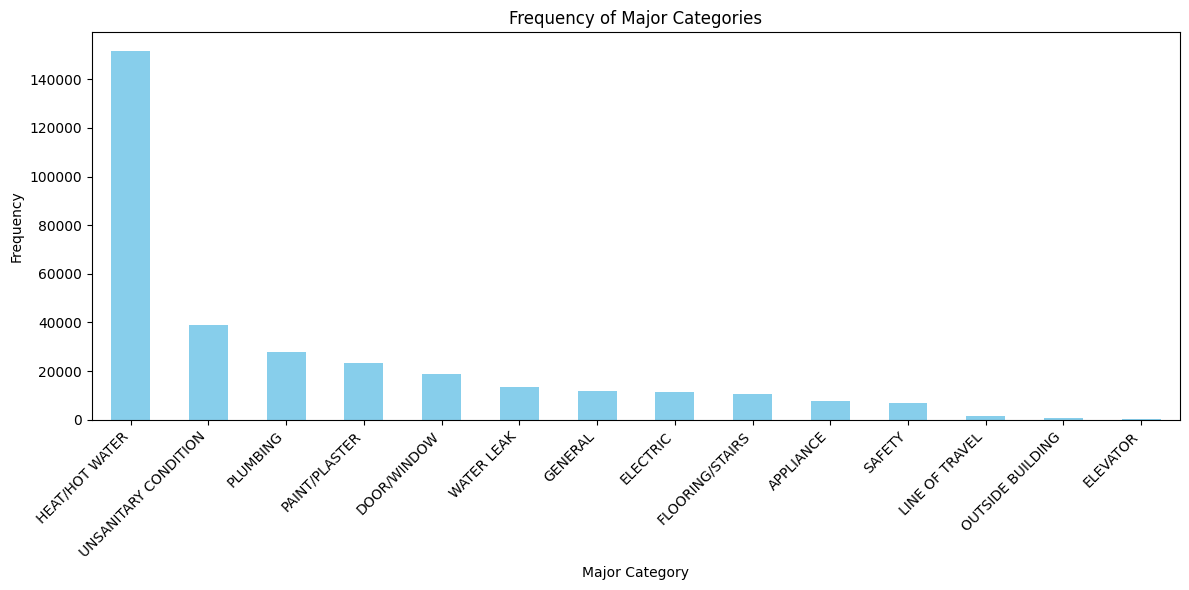

In [ ]:
import matplotlib.pyplot as plt

# Calculate the frequency of each unique value in the "Major Category" column
major_category_counts = df['Major Category'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
major_category_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Major Categories')
plt.xlabel('Major Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Data visualization

### Subtask:
Visualize the frequency of each unique value in the "Minor Category" column using a bar chart.


**Reasoning**:
I need to calculate the frequency of each unique value in the "Minor Category" column and then create a bar chart to visualize this frequency.



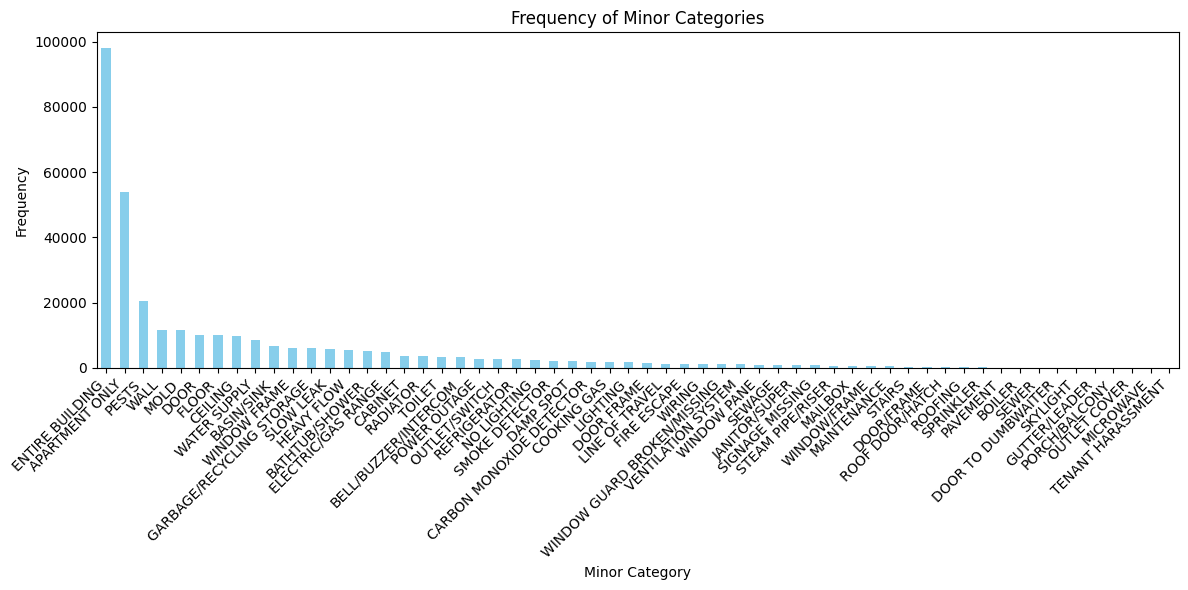

In [ ]:
import matplotlib.pyplot as plt

# Calculate the frequency of each unique value in the "Minor Category" column
minor_category_counts = df['Minor Category'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
minor_category_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Minor Categories')
plt.xlabel('Minor Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Data visualization

### Subtask:
Visualize the frequency of each unique value in the "Problem Code" column using a bar chart.


**Reasoning**:
Visualize the frequency of each unique value in the "Problem Code" column using a bar chart.



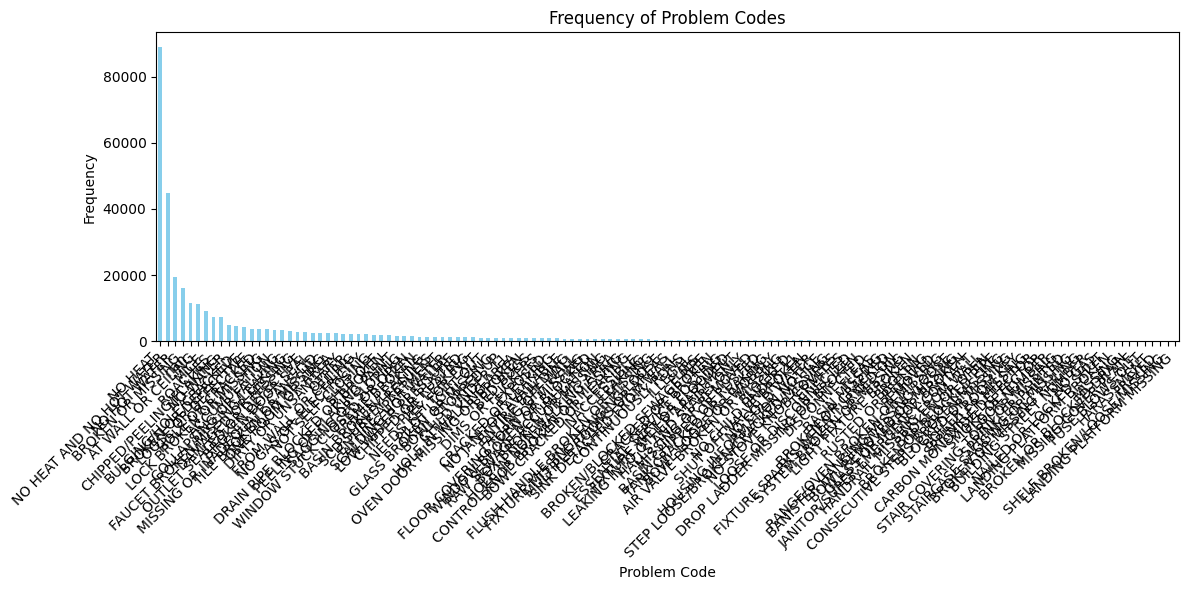

In [ ]:
import matplotlib.pyplot as plt

# Calculate the frequency of each unique value in the "Problem Code" column
problem_code_counts = df['Problem Code'].value_counts(dropna=False)

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
problem_code_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Problem Codes')
plt.xlabel('Problem Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()